In [391]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
from cliffs_delta import cliffs_delta

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 
3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [6]:
# load the data as a data frame
df = pd.read_csv("20to22NYC.csv")
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [7]:
# show the feature counts, and types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [8]:
# show the basic statistics for each feature(numeric and categoric)
df.describe(include="all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3273.500000,52.000000,NaN,NaN,NaN,11208.000000,NaN,NaN,NaN,2.500000e+03,1.810000e+03,1950.000000,2.000000,NaN,5.500000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6251.000000,1003.000000,NaN,NaN,NaN,11355.000000,NaN,NaN,NaN,3.909250e+03,2.670000e+03,1977.000000,2.000000,NaN,9.900000e+05,NaN


In [44]:
# show how many features have missing values
feat_miss = df.isnull().any().sum()
print(f"Number of features have missing values: {feat_miss}")
miss_col = df.columns[df.isnull().any()]
list(miss_col)

Number of features have missing values: 10


['TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT']

In [33]:
# the top-3 features with the most missing values
top3_mask = df.isnull().sum().sort_values().tail(3).index
df_top3 = df[top3_mask]
df_top3.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,APARTMENT NUMBER
0,3067.0,910.0,NaN
1,8000.0,3660.0,NaN
2,6200.0,2580.0,NaN
3,2500.0,1222.0,NaN
4,1845.0,1854.0,NaN


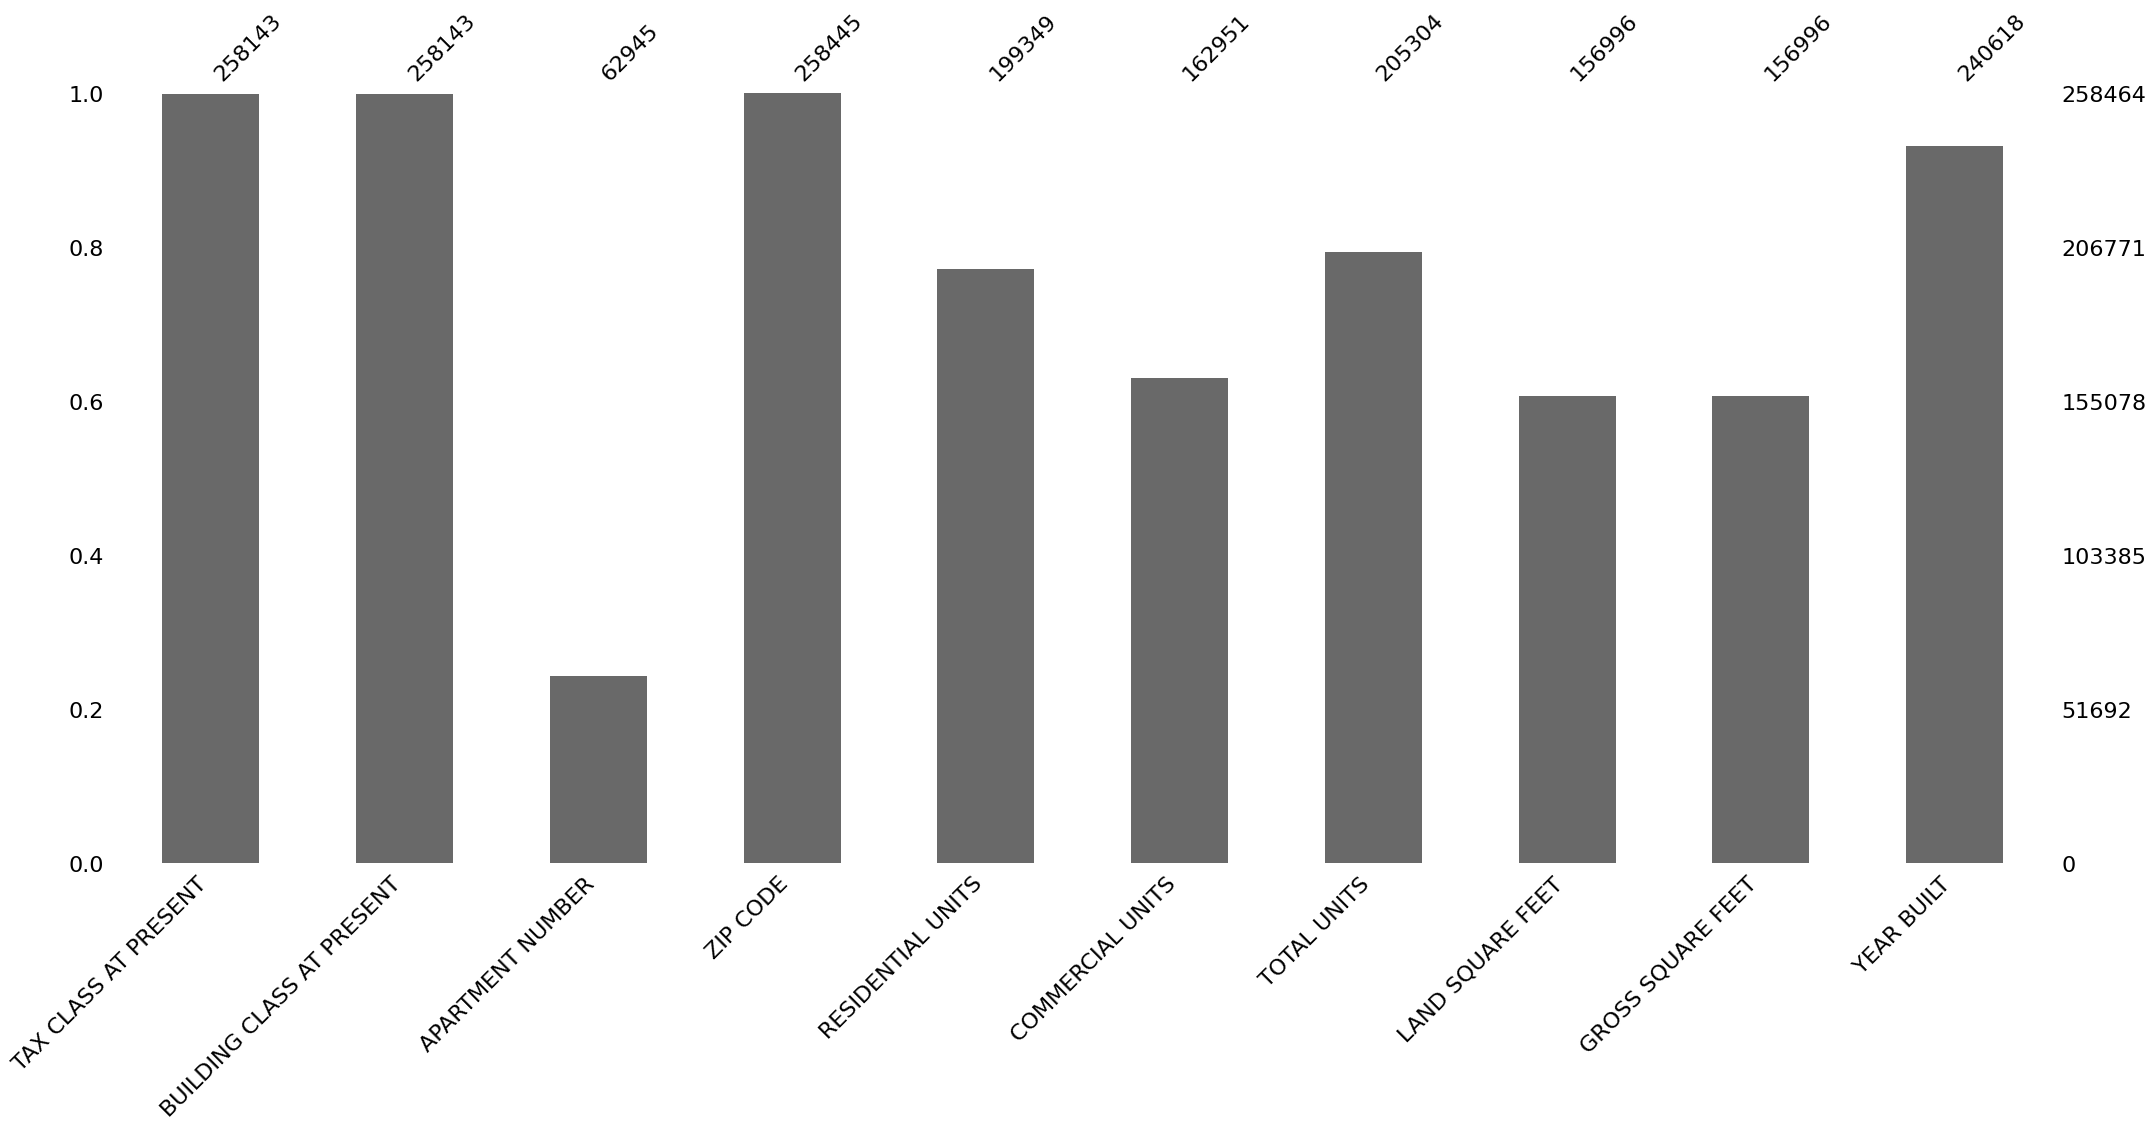

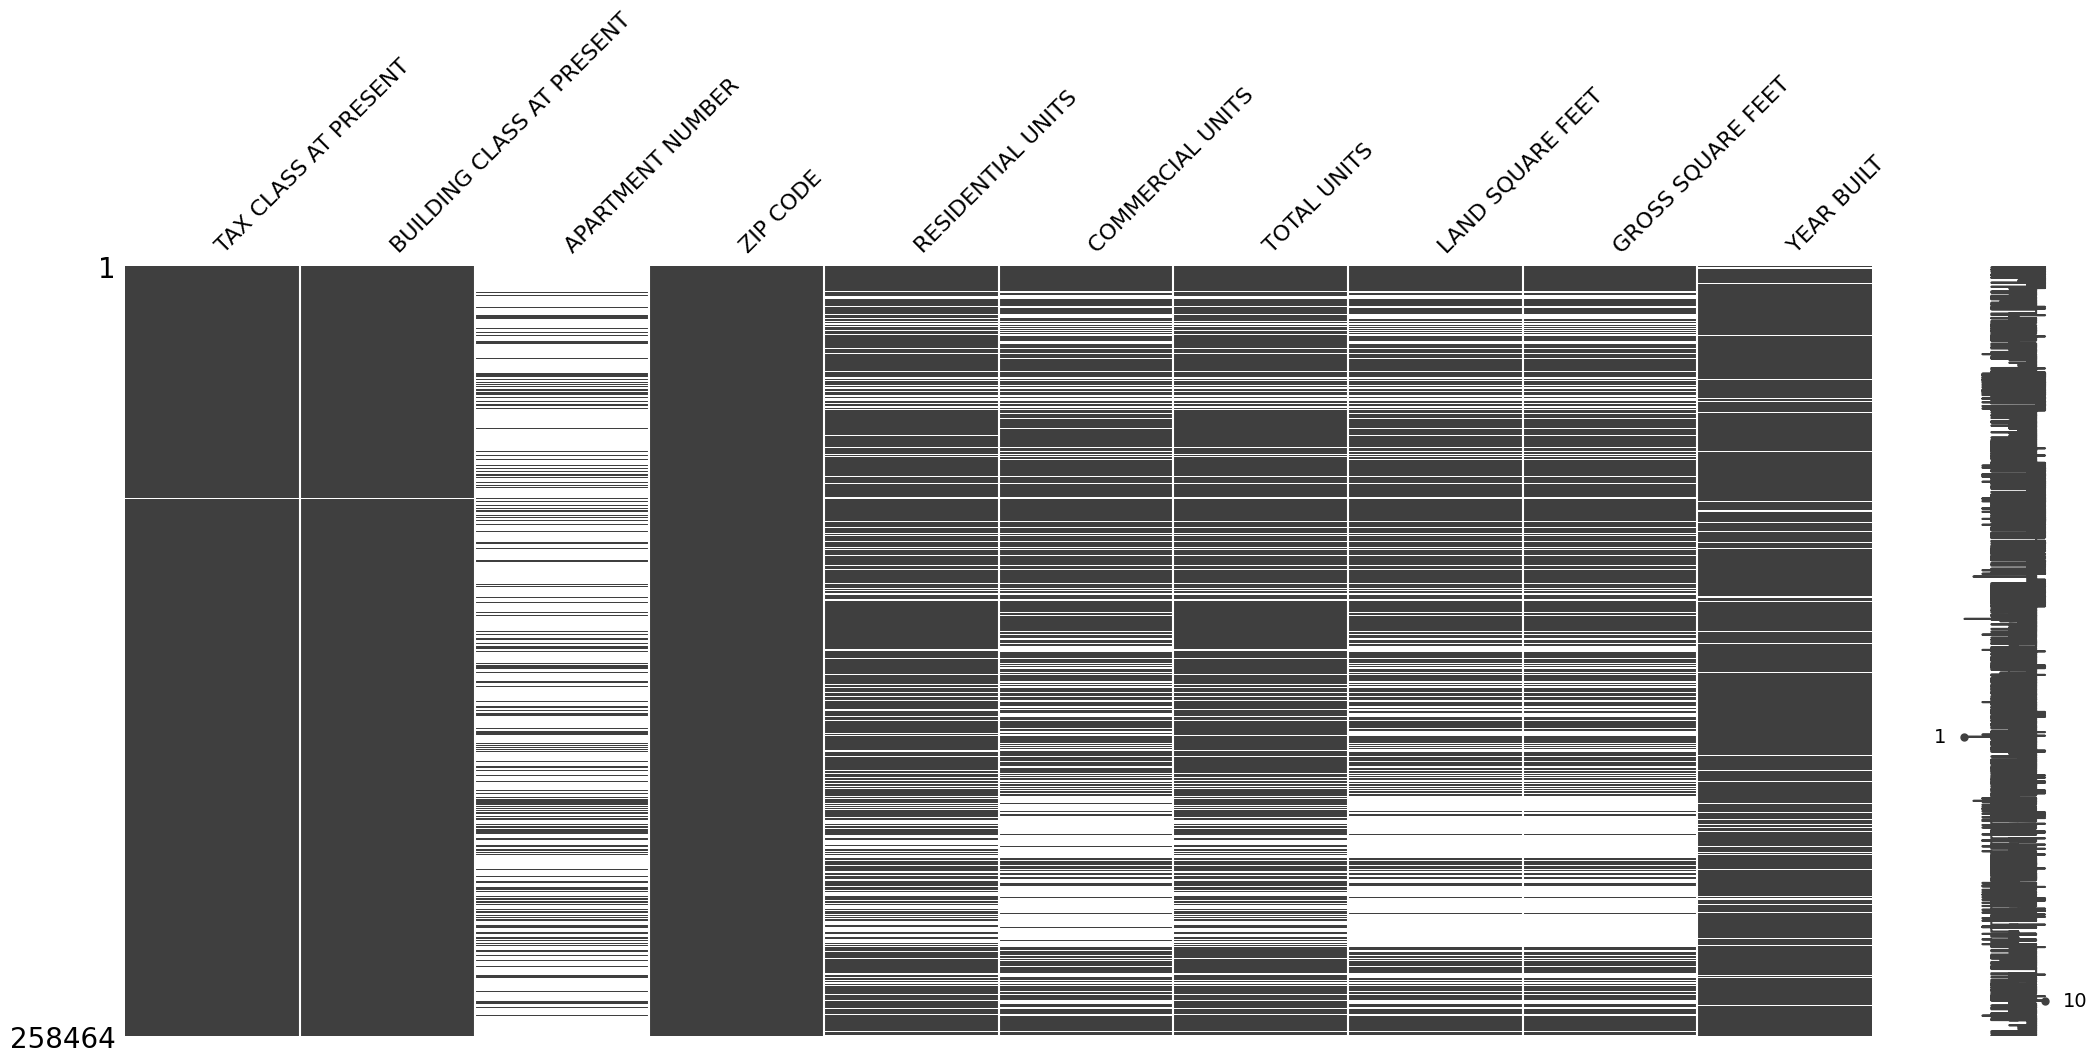

In [46]:
# Visualize the missing values pattern using missingno's bar function
msno.bar(df[miss_col]);

# Visualize the missing values pattern using missingno's matrix function
msno.matrix(df[miss_col]);

- Missing Patterns:
    - From the visualization above, we can notice that the features ("LAND SQUARE FEET", "GROSS SQUARE FEET") have a very high relationship with "COMMERCIAL UNITS" and the position of missing values are almost the same in these features. So we can say the pattern in these features ("LAND SQUARE FEET", "GROSS SQUARE FEET") is <b>"Unit Nonresponse pattern"</b>.
<br><br>
    - The feature "APARTMENT NUMBER" has the most number of missing values, but the distribution of missing values in this feature is random comparing with other features, so I think the pattern of misssing values in "APARTMENT NUMBER" is <b>"General Pattern"</b>.
<br><br>
-  Potential Missing Reason:
    - AS we can see the features ("LAND SQUARE FEET", "GROSS SQUARE FEET") have high dependency together, and with "COMMERCIAL UNITS", where each missing value in any one of them has a missing value in the other. So we can say the mechanism is <b>"MAR"</b>. 
    <br><br>
    - IN the feature "APARTMENT NUMBER" the data is misssing randomly. I can not find a good reason why the data is missing, So I think the mechanism is <b>"MCAR"</b>.

Question 2: Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

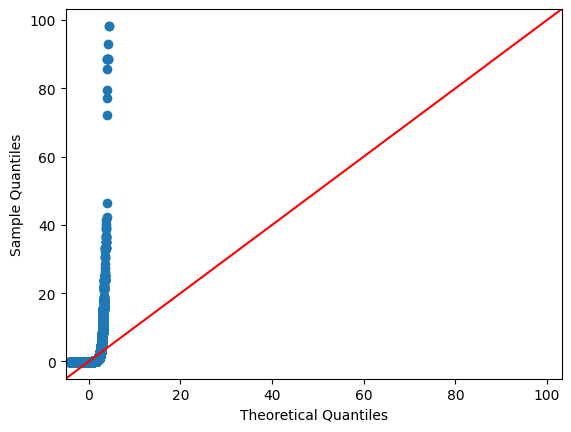

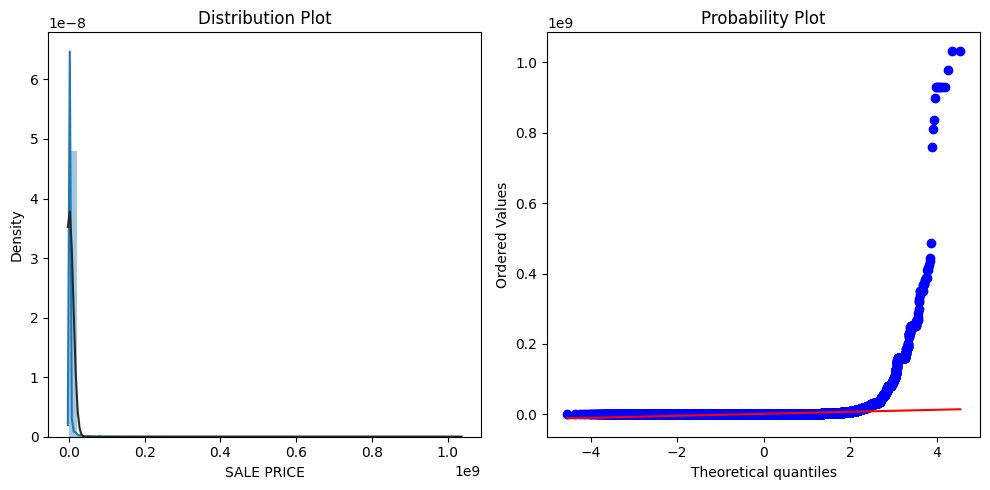

In [68]:
# Let's check if the points of "SALE PRICE" have been sampled from a normal distribution. 
# Let's try graphical methods first, using QQ plot. 


#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df["SALE PRICE"], line='45', fit = True)
plt.show()


# another way to perform graphical method.
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')
    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(df["SALE PRICE"])

In [71]:
#seems that the "SALE PRICE" does not follow normal distribution, let's perform statistical test.
# Shapiro-wilk test
w, pvalue = stats.shapiro(df["SALE PRICE"]) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test, ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = stats.normaltest(df["SALE PRICE"])
print("p = {:g}".format(p))

alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
p = 0
The null hypothesis can be rejected


- As we can notice the normality test for "SALE PRICE" is negative, where we checked the normality graphically and statistically, but we conclude with that the data points of "SALE PRICE" may not be normally distributed.


Question 3: Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


- "Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"
    - Hypothesis Test:

        - Null Hypothesis: The price of real estate in NYC has not changed following the declaration of the COVID-19 pandemic.
        - Alternative Hypothesis: The price of real estate in NYC has changed following the declaration of the COVID-19 pandemic.

In [114]:
# create a data frame with the sale price values and the date of sale
df_q1 = pd.Series(df["SALE PRICE"].values, index=pd.to_datetime(df["SALE DATE"]))

# create a mask to split the data before MARCH of 2020 and after it.
mask = df_q1.index < "2020-3-1"
data_before = df_q1[mask]

# Convert the mask to its reverse
mask = [not x for x in mask]
data_after = df_q1[mask]


# perform two-sided test.
statistic, pvalue = stats.mannwhitneyu(x=data_before, y=data_after, alternative = 'two-sided')

print("the p_value = {0:.5f}".format(pvalue))
if pvalue < 0.05: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis can not be rejected")

the p_value = 0.00000
The null hypothesis can be rejected


- From the result above, we conclude that we can accept: Alternative Hypothesis: The price of real estate in NYC has changed following the declaration of the COVID-19 pandemic. 

- "Do properties in Manhattan sell at higher prices than properties elsewhere?"
    - Hypothesis Test:
        - Null Hypothesis (H0): The sale price of properties in Manhattan is the same as the sale price of properties elsewhere.
        - Alternative Hypothesis (Ha): The sale price of properties in Manhattan is significantly higher than the sale price of properties elsewhere.

In [115]:
# get the "SALE PRICE" for Manhattan ("BOROUGH" = 1) and the price in elsewhere
manh_sale = df.loc[df["BOROUGH"] == 1]["SALE PRICE"]
elsewhere_sale = df.loc[df["BOROUGH"] != 1]["SALE PRICE"]

#We can check if SALE PRICE in Manhattan is higher than elsewhere 
statistic, pvalue = stats.mannwhitneyu(x=manh_sale, y=elsewhere_sale, alternative = 'greater')

print("the p_value = {0:.5f}".format(pvalue))
if pvalue < 0.05: # significance level
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis can not be rejected")

the p_value = 0.00000
The null hypothesis can be rejected


- From the result above, we conclude that we can accept: Alternative Hypothesis: The sale price of properties in Manhattan is significantly higher than the sale price of properties elsewhere.

Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

In [378]:
def wrangle(df, include_null=True):
    # remove the column with more than 60% of its data are missing values
    df = df.drop("APARTMENT NUMBER", axis=1)
    
    if not include_null:
        # remove rows with any missing values
        df = df.dropna()
        
    # caste the dtype of some columns
    # convert from object into numeric
    df["SALE DATE"] = pd.to_datetime(df["SALE DATE"]) 
    df["COMMERCIAL UNITS"] = df["COMMERCIAL UNITS"].astype(str).str.replace(",", "").astype(float)
    df["TOTAL UNITS"] = df["TOTAL UNITS"].astype(str).str.replace(",", "").astype(float)
    
    # convert from numeric into object
    df["YEAR BUILT"] = df["YEAR BUILT"].astype(str)
    
    # drop features with high cardinality
    df = df.drop("ADDRESS", axis=1)
    
    # drop columns with high collinearity
    df = df.drop("RESIDENTIAL UNITS", axis=1)
    df = df.drop("GROSS SQUARE FEET", axis=1)
    
    # drop "BOROUGH" as it's extracted from "NEIGHBORHOOD"
    df = df.drop("BOROUGH", axis=1)
    # drop "ZIP CODE" as it refers to "NEIGHBORHOOD"
    df = df.drop("ZIP CODE", axis=1)
    
    # extract the year feature from "SALE DATE"
    df["SALE DATE"] = df["SALE DATE"].dt.year.astype(str)
    return df
    

- Trial(1):
    - We will drop all missing values in this trial.

In [379]:
# create a feature matrix with removing missing values
df_drop_null = wrangle(df.copy(), False)

In [380]:
# split the data into features and target
target = "SALE PRICE"
X = df_drop_null.drop(target, axis=1)
y = df_drop_null[target]

In [381]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [382]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

In [383]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                     'TAX CLASS AT PRESENT',
                                     'BUILDING CLASS AT PRESENT', 'YEAR BUILT',
                                     'BUILDING CLASS AT TIME OF SALE',
                                     'SALE DATE'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [384]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"RMSE on trianind is: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"RMSE on testing is: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")

RMSE on trianind is: 9499834.454759816
RMSE on testing is: 9762940.991264733


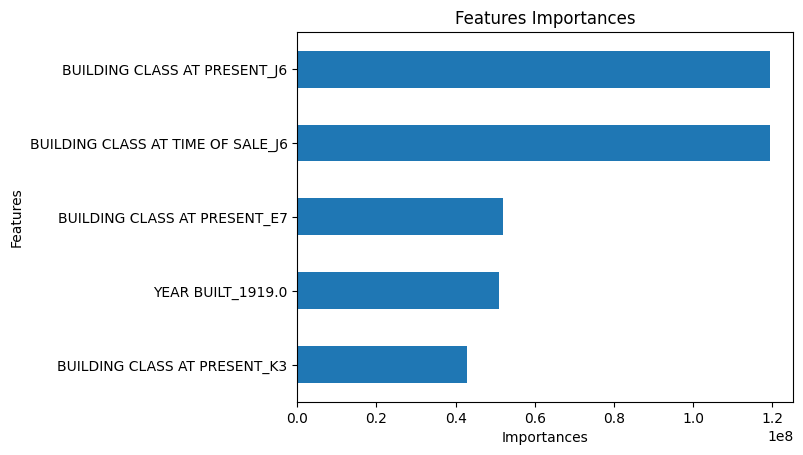

In [385]:
# visualize the features importances
importances = model.named_steps["linearregression"].coef_
feat = model.named_steps["linearregression"].feature_names_in_
importances = pd.Series(importances, index=feat).sort_values()

importances.tail().plot(kind="barh")
plt.title("Features Importances")
plt.xlabel("Importances")
plt.ylabel("Features");

- As we can see above the most important features are "BUILDING CLASS AT PRESENT_J6", and "BUILDING CLASS AT TIME OF SALE_J6". This happens when we drop all missing values.

- Trial(2):
    - We will impute all missing values in this trial.

In [387]:
# create a feature matrix without removing missing values
df_with_null = wrangle(df.copy())

In [389]:
# split the data into features and target
target = "SALE PRICE"
X = df_drop_null.drop(target, axis=1)
y = df_drop_null[target]

In [390]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [428]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

In [429]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                     'TAX CLASS AT PRESENT',
                                     'BUILDING CLASS AT PRESENT', 'YEAR BUILT',
                                     'BUILDING CLASS AT TIME OF SALE',
                                     'SALE DATE'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [431]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"RMSE on trianind is: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"RMSE on testing is: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")

RMSE on trianind is: 9442207.217492783
RMSE on testing is: 10342902.94506951


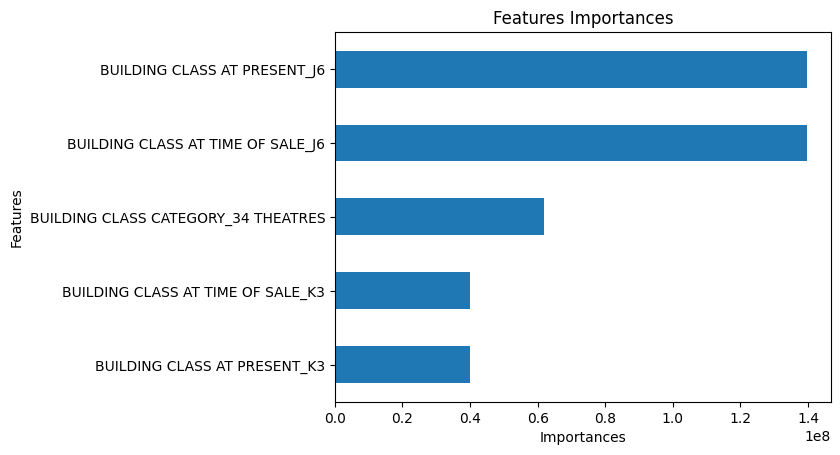

In [432]:
# visualize the features importances
importances = model.named_steps["ridge"].coef_
feat = model.named_steps["simpleimputer"].feature_names_in_
importances = pd.Series(importances, index=feat).sort_values()

importances.tail().plot(kind="barh")
plt.title("Features Importances")
plt.xlabel("Importances")
plt.ylabel("Features");

- As we can see above the most important features are "BUILDING CLASS AT PRESENT_J6", and "BUILDING CLASS AT TIME OF SALE_J6". This happens when we drop all missing values and when we impute the missing values too.